# Introduction
##Brain tumors are abnormal growths of cells within the brain or the central spinal canal. They can be benign (non-cancerous) or malignant (cancerous), and their impact on a patient's health can be profound due to the critical functions performed by the brain. Accurate diagnosis and timely treatment are crucial for improving patient outcomes.Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using Convolution-Neural Network (CNN) would be helpful to doctors all around the world.

## Importing Libraries

In [ ]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## For normal Cells

In [ ]:
normal_cells=os.listdir('/content/drive/MyDrive/Brian Tumor Dataset Project/no')

print(normal_cells[0:5])
print(normal_cells[-5:])

['23 no.jpg', '29 no.jpg', '22 no.jpg', '40 no.jpg', '17 no.jpg']
['no 91.jpeg', 'no 95.jpg', 'no 92.jpg', 'no 7.jpeg', 'no 97.jpg']


## For Tumor Cells

In [ ]:
tumor_cells=os.listdir('/content/drive/MyDrive/Brian Tumor Dataset Project/yes')

print(tumor_cells[0:5])
print(tumor_cells[-5:])

['Y105.jpg', 'Y109.JPG', 'Y1.jpg', 'Y103.jpg', 'Y104.jpg']
['Y92.jpg', 'Y92.png', 'Y91.jpg', 'Y85.JPG', 'Y86.JPG']


#### Length of the images from both of the files

In [ ]:
print('Length of the Normal Brain Cells: ',len(normal_cells))
print('Length of the Cancurus Brain Cells: ',len(tumor_cells))

Length of the Normal Brain Cells:  98
Length of the Cancurus Brain Cells:  155


-------

## Creating the Labels

- **0 --> Normal Cell**
- **1 --> Tumor Cell**

In [ ]:
normal_label=[0]*98
tumor_label=[1]*155

In [ ]:
print('Normal Cell labels: ',len(normal_label))
print('Tumor Cell labels: ',len(tumor_label))

Normal Cell labels:  98
Tumor Cell labels:  155


In [ ]:
print('With Normal labels: ',normal_label[0:5])
print('With Tumor labels: ',tumor_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
With Tumor labels:  [1, 1, 1, 1, 1]


----------

## Combining both labels into a single column

In [ ]:
labels=normal_label+tumor_label

print('Total labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Total labels are:  253
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [ ]:
type(labels)

list

---------

## Data Visualization

### a) Normal Cell image

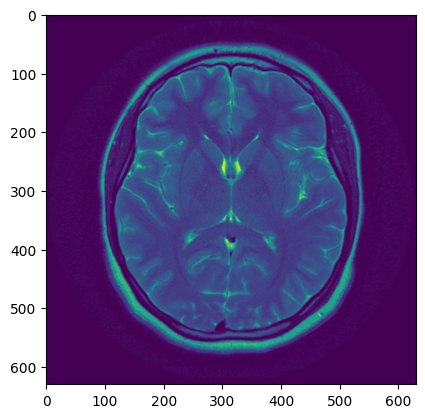

In [ ]:
nor_img=mpimg.imread('/content/drive/MyDrive/Brian Tumor Dataset Project/no/1 no.jpeg')

plt.imshow(nor_img)

### b) Tumour Cell image

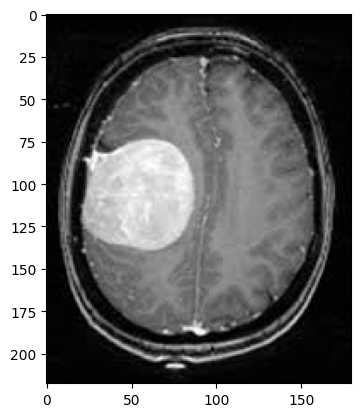

In [ ]:
nor_img=mpimg.imread('/content/drive/MyDrive/Brian Tumor Dataset Project/yes/Y1.jpg')

plt.imshow(nor_img)

### c) See the Distribution of the Labeled column

<Axes: ylabel='count'>

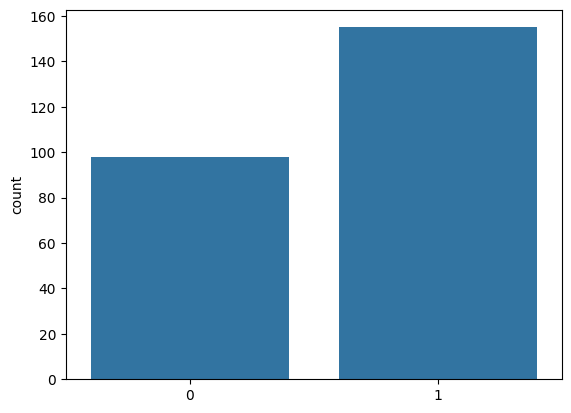

In [ ]:
import seaborn as sn


sn.countplot(x=labels)

------

## Image Preprocessing Steps

In [ ]:
normal_path=('//content/drive/MyDrive/Brian Tumor Dataset Project/no/')
data=[]

for img_file in normal_cells:
    image=Image.open(normal_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

tumor_path=('/content/drive/MyDrive/Brian Tumor Dataset Project/yes/')

for img_file in tumor_cells:
    image=Image.open(tumor_path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [ ]:
type(data)

list

**total length of the data**

In [ ]:
len(data)

253

**Checking the first image**

array([[[27, 27, 27],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [25, 25, 25],
        [26, 26, 26],
        [27, 27, 27]],

       [[27, 27, 27],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [26, 26, 26],
        [27, 27, 27],
        [27, 27, 27]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [27, 27, 27],
        [28, 28, 28],
        [28, 28, 28]],

       ...,

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[27, 27, 27],
        [23, 23, 23],
        [28, 28, 28],
        ...,
        [26, 26, 26],
        [28, 28, 28],
        [29, 29, 29]]], dtype=uint8)
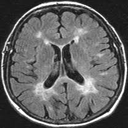

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

**Checking the shape of the single image**

In [ ]:
data[0].shape

(128, 128, 3)

----------

## Converting data and labels into numpy array

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(253, 128, 128, 3)
(253,)


---------

## Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(253, 128, 128, 3) (202, 128, 128, 3) (51, 128, 128, 3)


------

## Scaling the data

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0

-------------

## Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout

### a) Model Building

In [ ]:
num_of_classes=2

model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_of_classes, activation='sigmoid'))

### b) Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### c) Training the model

In [ ]:
history=model.fit(X_train,Y_train, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
6/6 [==============================] - 10s 1s/step - loss: 9.1700 - accuracy: 0.5580 - val_loss: 4.5188 - val_accuracy: 0.5714
Epoch 2/50
6/6 [==============================] - 8s 1s/step - loss: 2.0853 - accuracy: 0.7514 - val_loss: 1.8437 - val_accuracy: 0.6667
Epoch 3/50
6/6 [==============================] - 6s 1s/step - loss: 0.8286 - accuracy: 0.7680 - val_loss: 0.9192 - val_accuracy: 0.7143
Epoch 4/50
6/6 [==============================] - 9s 2s/step - loss: 0.3323 - accuracy: 0.8840 - val_loss: 0.5893 - val_accuracy: 0.8571
Epoch 5/50
6/6 [==============================] - 6s 980ms/step - loss: 0.2086 - accuracy: 0.9392 - val_loss: 0.4395 - val_accuracy: 0.8095
Epoch 6/50
6/6 [==============================] - 8s 1s/step - loss: 0.1621 - accuracy: 0.9558 - val_loss: 0.5323 - val_accuracy: 0.8095
Epoch 7/50
6/6 [==============================] - 10s 2s/step - loss: 0.1126 - accuracy: 0.9613 - val_loss: 0.4268 - val_accuracy: 0.8095
Epoch 8/50
6/6 [====================

### d) Model Evaluation

In [ ]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 1s 186ms/step - loss: 0.5979 - accuracy: 0.9020


[0.5978598594665527, 0.9019607901573181]

#### Accuracy is 90%

### e) Learning Curve

**i) Accuracy Curve**

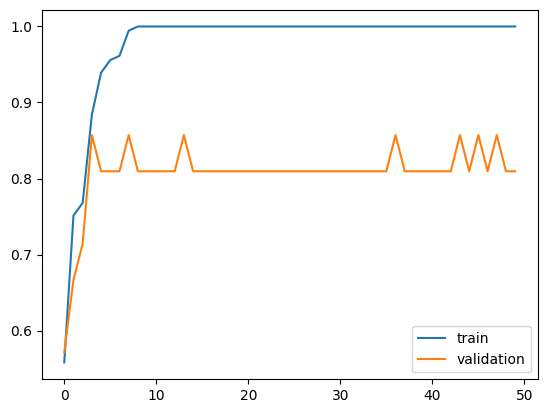

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()
plt.show()

**ii) Loss Curve**

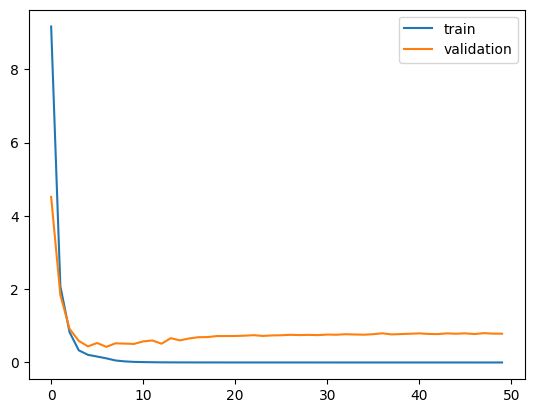

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.legend()
plt.show()

----

## Prediction Function

### a) For Normal Cell

Enter the path of the image: /content/drive/MyDrive/Brian Tumor Dataset Project/no/1 no.jpeg


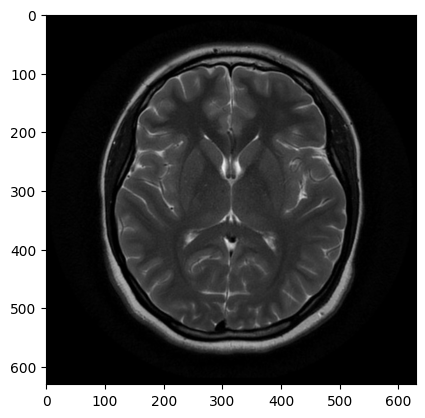

1/1 [==============================] - 0s 141ms/step
Prediction Probabilities are:   [[9.7249699e-01 1.0003224e-04]]
Normal Cell


In [ ]:
input_image_path=input('Enter the path of the image: ')

input_image=cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()


# Ensure the shape matches the expected input shape of your model
input_image_reshape=cv2.resize(input_image,(128,128))


# Normalize the pixel values
image_normalized=input_image_reshape/255


# Reshape for model prediction
img_reshape=np.reshape(image_normalized,(1,128,128,3))


# Make Predictions
input_prediction=model.predict(img_reshape)

# Display the prediction Probabilities
print('Prediction Probabilities are:  ',input_prediction)


# Get the Predicted Label
input_pred_label=np.argmax(input_prediction)


if input_pred_label ==1:
    print('Tumor Cell')
else:
    print('Normal Cell')

### b) For Tumor Cell

Enter the path of the image: /content/drive/MyDrive/Brian Tumor Dataset Project/yes/Y1.jpg


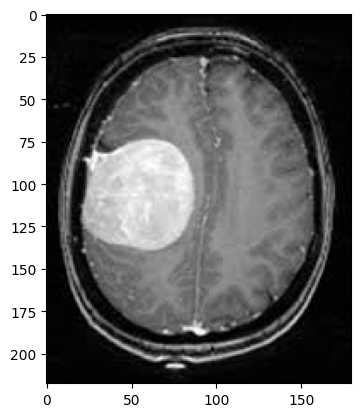

1/1 [==============================] - 0s 40ms/step
Prediction Probabilities are:   [[0.02287594 0.99986154]]
Tumor Cell


In [ ]:
input_image_path=input('Enter the path of the image: ')

input_image=cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()


# Ensure the shape matches the expected input shape of your model
input_image_reshape=cv2.resize(input_image,(128,128))


# Normalize the pixel values
image_normalized=input_image_reshape/255


# Reshape for model prediction
img_reshape=np.reshape(image_normalized,(1,128,128,3))


# Make Predictions
input_prediction=model.predict(img_reshape)

# Display the prediction Probabilities
print('Prediction Probabilities are:  ',input_prediction)


# Get the Predicted Label
input_pred_label=np.argmax(input_prediction)


if input_pred_label ==1:
    print('Tumor Cell')
else:
    print('Normal Cell')

-------

## Saving the Model

In [ ]:
model.save('tumor_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


-------

# Conclusion
## In conclusion, the development of a Convolutional Neural Network (CNN) model for Brain tumor prediction using a dataset of Brain MRI Images that are tumorous or non- tumorous presents a promising approach to improving early detection and management of this sight-threatening disease.